In [9]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [10]:
# define the state
class BMIstate(TypedDict):
    weight_kg: float
    height_m: float
    bmi: float

In [11]:
def cal_bmi(state: BMIstate) -> BMIstate:
    weight = state['weight_kg']
    height = state['height_m']

    bmi = round((weight/height**2), 2)

    state['bmi'] = bmi

    return state


In [ ]:
# define the graph
graph = StateGraph(BMIstate)

# add nodes to the graph
graph.add_node("calculate bmi", cal_bmi)

# add edges to the graph
graph.add_edge(START, "calculate bmi")
graph.add_edge("calculate bmi", END)

# compile the graph
workflow = graph.compile()

In [ ]:
# execute the graph
workflow.invoke({'weight_kg': 80, 'height_m': 1.7})

{'weight_kg': 80, 'height_m': 1.7, 'bmi': 27.68}

## Visualizing the grph

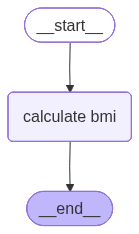

In [20]:
from IPython.display import Image, display

display(Image(workflow.get_graph().draw_mermaid_png()))